In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# df = pd.read_csv("./cleaned_df.csv",)
# df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [ ]:
df = pd.read_csv("./cleaned_df.csv", index_col=0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [ ]:
#
# df.isnull().sum()

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.shape

(303, 14)

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.5 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,245.194719,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,48.488324,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
#splotting the data in x and y
y = df['target']
X = df.drop('target',axis=1)

#train test split()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
scaler = StandardScaler()

#can you please look up what is .fit(), .transform(), .fit_transform()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0]

array([-1.00211396, -1.42427927, -0.00459922, -1.16156469, -1.65735365,
       -0.48224282,  0.92129686, -0.5756441 , -0.6723502 , -0.90541697,
       -0.66152326, -0.71154972, -0.50943038])

## Baseline Model

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.4945054945054945

In [ ]:
why are we using x-test & ytest in .score() method rather than y_test & y_pred?

Object `y_pred` not found.


## logistic Regression

In [ ]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
lr_acc_score = accuracy_score(y_test,y_pred_log)
lr_f1_score = f1_score(y_test,y_pred_log)
lr_conf_matrix = confusion_matrix(y_test,y_pred_log)

#print
print(f"Test Accuracy score : {lr_acc_score}")
print(f"Test F1 : {lr_f1_score}")
print('\n')
print("Confusion matrix")
print(lr_conf_matrix)

print(classification_report(y_test, y_pred_log))

Test Accuracy score : 0.8571428571428571
Test F1 : 0.8571428571428571


Confusion matrix
[[39  8]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        47
           1       0.83      0.89      0.86        44

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



## Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

tree_acc_score = accuracy_score(y_test,y_pred_tree)
tree_f1_score = f1_score(y_test,y_pred_tree)
tree_conf_matrix = confusion_matrix(y_test,y_pred_tree)


#print
print(f"Test Accuracy score : {tree_acc_score}")
print(f"Test F1 : {tree_f1_score}")
print('\n')
print("Confusion matrix")
print(tree_conf_matrix)

print(classification_report(y_test, y_pred_tree))

Test Accuracy score : 0.7472527472527473
Test F1 : 0.7294117647058823


Confusion matrix
[[37 10]
 [13 31]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        47
           1       0.76      0.70      0.73        44

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



[Text(0.5362903225806451, 0.95, 'cp <= -0.492\ngini = 0.49\nsamples = 212\nvalue = [91, 121]'),
 Text(0.29838709677419356, 0.85, 'ca <= -0.177\ngini = 0.388\nsamples = 95\nvalue = [70, 25]'),
 Text(0.20967741935483872, 0.75, 'thal <= 0.362\ngini = 0.497\nsamples = 41\nvalue = [19, 22]'),
 Text(0.12903225806451613, 0.65, 'exang <= 0.407\ngini = 0.365\nsamples = 25\nvalue = [6, 19]'),
 Text(0.06451612903225806, 0.55, 'chol <= 1.383\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.03225806451612903, 0.45, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.0967741935483871, 0.45, 'chol <= 2.268\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06451612903225806, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12903225806451613, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1935483870967742, 0.55, 'restecg <= -0.027\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.16129032258064516, 0.45, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.225806451612

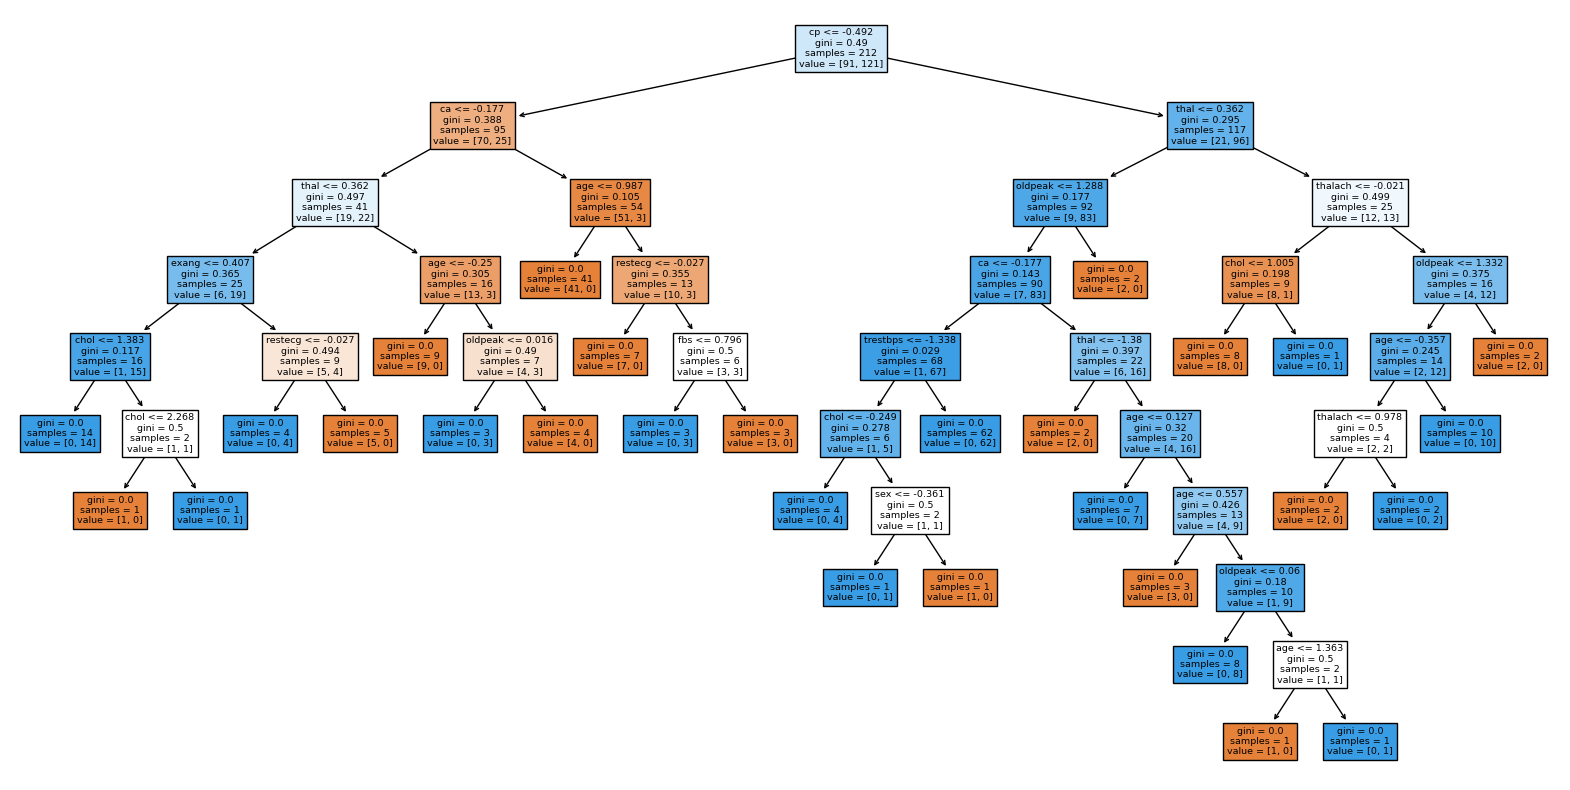

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree.fit(X_train,y_train)

plt.figure(figsize=(20,10))

plot_tree(tree, filled=True, feature_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

# Random Forest


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_forest = rfc.predict(X_test)

rfc_acc_score = accuracy_score(y_test, y_pred_forest)
rfc_f1_score = f1_score(y_test, y_pred_forest)
rfc_conf_matrix = confusion_matrix(y_test, y_pred_forest)

print(f"Test aCC Score : {rfc_acc_score}")
print(f"Test F1 Score : {rfc_f1_score}")
print(rfc_conf_matrix)

print(classification_report(y_test, y_pred_forest))

Test aCC Score : 0.7472527472527473
Test F1 Score : 0.7415730337078651
[[35 12]
 [11 33]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        47
           1       0.73      0.75      0.74        44

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [ ]:
#Naive bAYES

nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred_nb = nb.predict(X_test)

nb_acc_score = accuracy_score(y_test, y_pred_nb)
nb_f1_score = f1_score(y_test, y_pred_nb)
nb_conf_score = confusion_matrix(y_test, y_pred_nb)

print(f"Test aCC score : {nb_acc_score}")
print(f"Test f1 SCORE : {nb_f1_score}")


print("Confusion matrix")
print(nb_conf_score)

print(classification_report(y_test, y_pred_nb))

Test aCC score : 0.8241758241758241
Test f1 SCORE : 0.8139534883720929
Confusion matrix
[[40  7]
 [ 9 35]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        47
           1       0.83      0.80      0.81        44

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [ ]:
model_perf = pd.DataFrame({'Model':['Dummy Classifer',"Logistic Regression","Decision Tree","Random Forest","Naive Byes"],
                          "Acuuracy":[dummy_clf.score(X_test, y_test),lr_acc_score,tree_acc_score,rfc_acc_score,nb_acc_score ]})

In [ ]:
model_perf

,Model,Acuuracy
0,Dummy Classifer,0.516484
1,Logistic Regression,0.857143
2,Decision Tree,0.747253
3,Random Forest,0.747253
4,Naive Byes,0.824176
